In [1]:
print("test")

test


In [5]:
import pandas as pd 
import openpyxl 
import os 
import numpy as np
import glob

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

print("ok")

ok


In [2]:
# อ่านไฟล์กระดาษฟอล์ย อ้างอิง 

reference = pd.read_csv("data2000/Dark_1.csv", skiprows=2, names=["wavelength", "data"])
reference

,wavelength,data
0,340,136
1,341,27
2,342,14
3,343,190
4,344,104
...,...,...
656,996,1426
657,997,1377
658,998,1578
659,999,1621


In [ ]:
samples = [] 
# อ่านไฟล์ส้ม
for i in range(30):
    df = pd.read_csv(f"data2000/{i+1}_t.csv", skiprows=2, names=["wavelength", "data"])
    sample_data = df['data'].values / (reference['data'].values + 1)
    sample_data=np.array(sample_data)
    sample_data = (sample_data - np.min(sample_data) /( np.max(sample_data)-np.min(sample_data)))
    samples.append(sample_data)
    
X = np.array(samples)

In [ ]:
directory = os.getcwd() + '/data2000'
csv_files = glob.glob(os.path.join(directory, '*_t.csv'))
filses = pd.read_csv(csv_files[0]).drop(index=0)
wavelength = filses.iloc[:, 0]
# สร้าง DataFrame ที่มี column เริ่มต้นจาก wavelength
table = pd.DataFrame({ 'wavelength': wavelength })

# นำคอลัมน์อื่น ๆ มาต่อกันเรื่อย ๆ
for file in csv_files:
    # อ่านคอลัมน์ที่ต้องการจากไฟล์ CSV
    spectrum = pd.read_csv(file).iloc[:, 1]
    # เพิ่มคอลัมน์ของ spectrum เข้าไปใน DataFrame และใช้ชื่อไฟล์เป็นชื่อคอลัมน์
    table[os.path.basename(file)] = spectrum
print(table)
# บันทึก DataFrame เป็นไฟล์ CSV
table.to_csv('all_files_t.csv', index=False)


In [7]:
dataSam = pd.read_csv('all_files_t.csv')
dataSam

,wavelength,193_t.csv,217_t.csv,153_t.csv,132_t.csv,177_t.csv,233_t.csv,148_t.csv,249_t.csv,231_t.csv,...,179_t.csv,144_t.csv,245_t.csv,200_t.csv,247_t.csv,202_t.csv,146_t.csv,186_t.csv,162_t.csv,226_t.csv
0,340,0.0,0.0,8.0,32.0,117.0,23.0,43.0,0.0,34.0,...,79.0,65.0,21.0,0.0,7.0,0.0,16.0,0.0,0.0,31.0
1,341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,68.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0
2,342,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,343,0.0,0.0,51.0,147.0,0.0,0.0,0.0,17.0,0.0,...,0.0,177.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,344,0.0,0.0,0.0,0.0,90.0,0.0,0.0,0.0,48.0,...,0.0,121.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,996,472.0,864.0,947.0,1170.0,2688.0,1149.0,516.0,664.0,420.0,...,2546.0,364.0,608.0,726.0,548.0,583.0,358.0,732.0,881.0,712.0
657,997,537.0,903.0,950.0,1168.0,2619.0,1197.0,453.0,599.0,536.0,...,2431.0,444.0,712.0,767.0,560.0,605.0,341.0,733.0,938.0,631.0
658,998,618.0,1022.0,1180.0,1424.0,2916.0,1331.0,564.0,730.0,613.0,...,2780.0,518.0,882.0,944.0,729.0,839.0,425.0,850.0,1268.0,718.0
659,999,607.0,902.0,1124.0,1258.0,2876.0,1240.0,551.0,728.0,561.0,...,2804.0,461.0,904.0,833.0,713.0,738.0,411.0,831.0,1123.0,781.0


ValueError: x and y must have same first dimension, but have shapes (661,) and (660, 121)

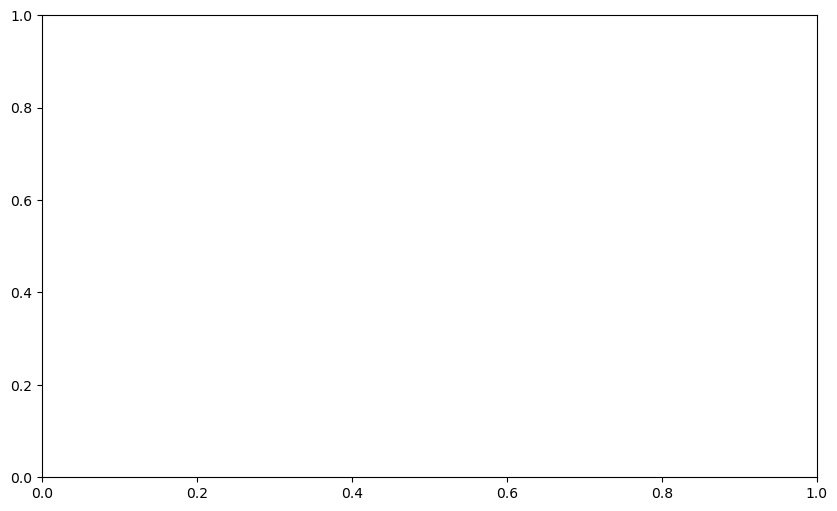

In [8]:
plt.figure(figsize=(10, 6))

# Plot actual sales
plt.plot(dataSam['wavelength'], dataSam["193_t"])

# # Plot moving average
# plt.plot(df_sales['Month'], df_sales['Moving Average'], label='Moving Average', linestyle='--', color='red')

# # Customize plot
# plt.title('Monthly Sales and Moving Average')
# plt.xlabel('Month')
# plt.ylabel('Sales')
# plt.xticks(rotation=45)
# plt.legend()
# plt.grid(True)

plt.show()
